# Storytelling Data Visualization Lab

In this lab you'll use a dataset called `housing_prices.csv` which contains the sales data of houses. The dataset and descriptions of the columns are available from [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data). For your convenience, you can review the descriptions of the data columns from [here](https://drive.google.com/file/d/1-iXooLjNuEXU41dqz8ORQ5JEZPHd9x0X/view?usp=sharing).

Pretend you are a data analyst at an investment company where the board decided to make investments in real estates. Your boss asked you to analyze this housing sales dataset and present to the investment managers on **what features of houses are strong indicators of the final sale price**. You need to present your findings in intuitive ways so that the investment managers understand where your conclusions come from.

#### You will use the appropriate data visualization graphs to tell your stories.

## Challenge 1 - Understanding the Dataset

After receiving the data and clarifying your objectives with your boss, you will first try to understand the dataset. This allows you to decide how you will start your research in the next step.

The dataset is [here](https://drive.google.com/file/d/1MRhRtdX8QuPPEhelBIS_FEl5vJjRLSeE/view?usp=sharing). Please download it and place it in the data folder.<br>
First, import the basic libraries and the dataset.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline
import seaborn as sns

df = pd.read_csv('../data/housing_prices.csv')
housing_data = df.copy()

#### As a routine before analyzing a dataset, print the first few rows of the dataset

You find the dataset has 81 columns which are a lot. 

#### Since the column `Id` is meaningless in our data visualization work, let's drop it

In [2]:
# your code here
df.drop(['Id'], axis = 'columns',inplace=True)
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


You care about missing values. If a column has too many missing values, it is not reliable to use it to predict sales price.

#### In the cell below, calculate the percentage of missing values for each column. 

Make a table containing the column name and the percentage of missing values. Print the columns where more than 20% of values are missing. An example of what your output  should look like is [here](https://drive.google.com/file/d/1cuq6qhFZC5wavm-_STcxktBKdAc4xvH8/view?usp=sharing)

[This reference](https://stackoverflow.com/questions/51070985/find-out-the-percentage-of-missing-values-in-each-column-in-the-given-dataset) can help you make the missing values table.

In [3]:
#to get list of columns with missing data
column_with_nan = df.columns[df.isnull().any()]
df.shape

(1460, 80)

In [4]:
#loop through each of the columns with missing values and check for condition
for column in column_with_nan:
     if df[column].isnull().sum()*100.0/df.shape[0] > 20:
            print(column, df[column].isnull().sum())    

Alley 1369
FireplaceQu 690
PoolQC 1453
Fence 1179
MiscFeature 1406


#### Drop the columns you find that have more than 20% missing values.

After dropping, check the shape of your dataframes. You should have 75 columns now.

In [5]:
# your code here
for column in column_with_nan:
    if df[column].isnull().sum()*100.0/df.shape[0] > 20:
        df.drop(column,1, inplace=True)  
df.shape

(1460, 75)

Since you're asked to analyze sale prices, first let's see if the sale prices (column `SalePrice`) has a normal distribution. This is important because normally distributed data can be better represented with mathematical models.

#### In the cell below, use the propriate graph to visualize the shape of distribution of the sale prices. Then explain what you find from the graph about data distribution.

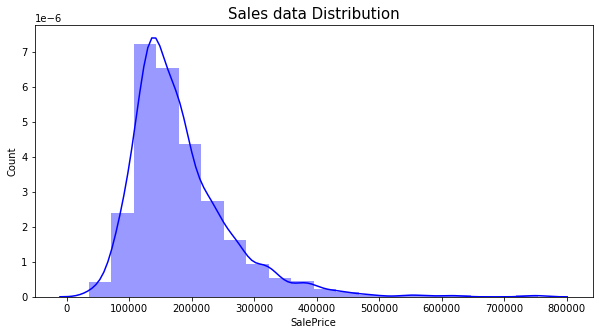

In [44]:
# your code here
plt.figure(figsize=(10,5))
sns.distplot(df['SalePrice'],color = 'blue',bins = 20)
plt.title("Sales data Distribution",fontsize = 15)
plt.xlabel("SalePrice")
plt.ylabel("Count")
plt.show()


In [36]:
# your comment here
#The plot is barely normally distributed.
#It clearly has a positive skewness,meaning there are more data alighed to the left side of the plot.
#Paolo: yes, there is something that is off though in the plot. The y axis shows a very low cont
#( order of 1e-6), why? (Hint: try to explore the paramter kde in distplot)

## Bonus Challenge 1 - Adjust Data Distribution

If you used the correct method in the previous step, you should have found the data distribution is skewed to the left. In order to improve your data visualization in the next steps, you can opt to adjust the `SalePrice` column by applying a mathematical function to the values. The goal is to produce a bell-shape normal distribution after applying the mathematical function to the sale price.

*This technique is optional in data visualization but you'll find it useful in your future machine learning analysis.*

#### In the cell below, adjust the `SalePrice` column so that the data are normally distributed.

Try applying various mathematical functions such as square root, power, and log to the `SalePrice` column. Visualize the distribution of the adjusted data until you find a function that makes the data normally distributed. **Create a new column called `SalePriceAdjusted` to store the adjusted sale price.**

In [8]:
# your code here


## Challenge 2 - Exploring Data with Common Sense

Now that we have a general understanding of the dataset, we start exploring the data with common sense by means of data visualization. Yes, in data analysis and even machine learning you are often required to use common sense. You use your common sense to make a scientific guess (i.e. hypothesis) then use data analytics methods to test your hypothesis.

This dataset is about housing sales. According to common sense, housing prices depend on the following factors:

* **Size of the house** (`GrLivArea`, `LotArea`, and `GarageArea`).

* **Number of rooms** (`BedroomAbvGr`, `KitchenAbvGr`, `FullBath`, `HalfBath`, `BsmtFullBath`, `BsmtHalfBath`).

* **How long the house has been built or remodeled** (`YearBuilt` and `YearRemodAdd`).

* **Neighborhood of the house** (`Neighborhood`).

#### In this challenge, use the appropriate graph type to visualize the relationships between `SalePrice` (or `SalePriceAdjusted`) and the fields above. 

Note that:

* Transform certain columns in order to visualize the data properly based on common sense. For example:
    * Visualizing how the number of half bathrooms affected the sale price probably does not make sense. You can create a new column to calculate the total number of bathrooms/rooms then visualize with the calculated number.
    * `YearBuilt` and `YearRemodAdd` are year numbers not the age of the house. You can create two new columns for how long the house has been built or remodeled then visualize with the calculated columns.
* Make comments to explain your thinking process.

Which neighborhood has the highest average sale price ?

Text(0.5, 1.0, 'Average Saleprice per Neighborhood')

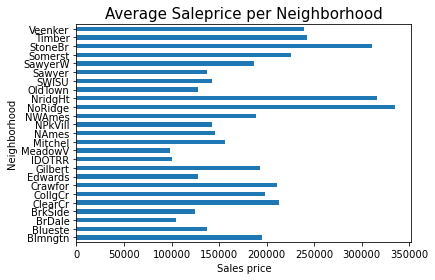

In [9]:
df_places = df[["Neighborhood", "SalePrice"]]
df_places.groupby("Neighborhood")['SalePrice'].mean().plot(kind="barh")
plt.xlabel("Sales price")
plt.title("Average Saleprice per Neighborhood",fontsize = 15)

In [10]:
#Houses in the "NoRidge" neighborhood is shown to have the highest average saleprice over the years.
#paolo: yes! you could also play with figsize to make the plot bigger

How does the age of a house (Year built /Remodelled) affect the saleprice ?

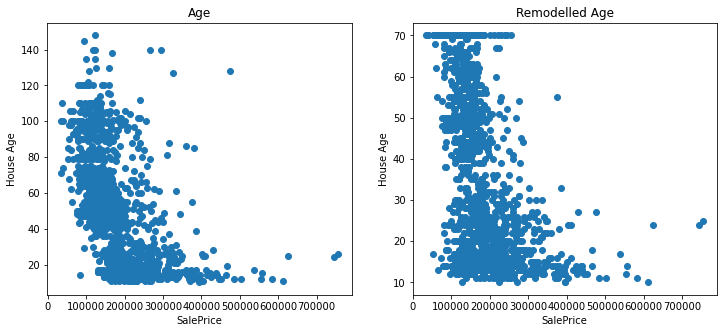

In [11]:
# your code here
#Derived new columns "Age" and "Remodelled Age" from existing columns "Year Built"& "YearRemodAdd" respectively.
df['Age'] = 2020 - df['YearBuilt']
df['Remodelled Age'] = 2020 - df['YearRemodAdd']
col=['Age','Remodelled Age']

fig, ax = plt.subplots(nrows=1,ncols=2,figsize = (12,5))
x= df['SalePrice']
y= df[['Age','Remodelled Age']]

for pos, column in enumerate(col):   # Pick a first col
    plt.sca(ax[pos])
    plt.scatter(df['SalePrice'],df[column])
    plt.title(column)
    plt.xlabel('SalePrice')
    plt.ylabel('House Age')
plt.show()

In [12]:
#Observations: 1.Its seen that basically ,more sales have occured for houses that have been remodelled.
#2.The age of the house has a negative correlation with Saleprice. i.e higher the age,lesser the value(saleprice) for the house.

How does the size of the house affect the sales price ?

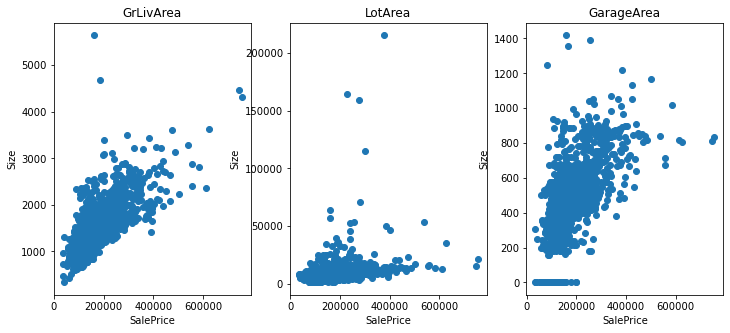

In [13]:
col = ['GrLivArea','LotArea','GarageArea']
df['Size'] = df['GrLivArea']+df['LotArea']+df['GarageArea']
fig, ax = plt.subplots(nrows=1,ncols=3,figsize = (12,5))
x= df['SalePrice']
y= df[['GrLivArea','LotArea','GarageArea']]

for pos, column in enumerate(col):   # Pick a first col
    plt.sca(ax[pos])
    plt.scatter(df['SalePrice'],df[column])
    plt.title(column)
    plt.xlabel('SalePrice')
    plt.ylabel('Size')
plt.show()

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

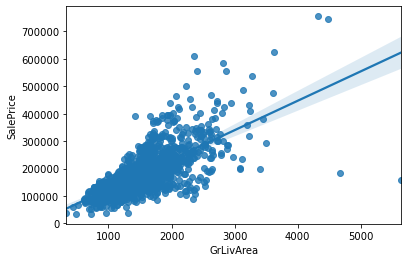

In [14]:
sns.regplot(x=df['GrLivArea'], y=df['SalePrice'], data = df)

In [15]:
#It can be clearly seen from the plots that Living Area has a linear relation , a strong positive correlation with Saleprice.
#GarageArea is also fairly positively correlated .
#Lot Area does not have much impact on the Saleprice.

Does the number of rooms affect the sales price of a house ?

In [16]:
df['Total_rooms'] = df['BedroomAbvGr']+ df['KitchenAbvGr'] + df['FullBath']+ (0.5 * df['HalfBath']) + df['BsmtFullBath']+ (0.5*df['BsmtHalfBath'])

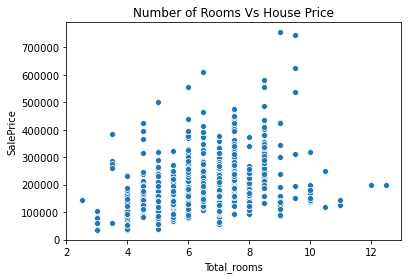

In [17]:
sns.scatterplot(x = 'Total_rooms',y = 'SalePrice',data=df)
plt.title('Number of Rooms Vs House Price')
plt.show()

#Explanation to follow
#paolo: why do you choose this plot instead of a bar plot?

## Bonus Challenge 2 - Exploring Data with Correlation Heatmap

Now you have explored data visualizations with certain fields based on common sense. In the dataset there are many other fields that you are not sure whether they are important factors for the sale price. What is the best way to explore those fields without investigating them individually?

Making scatter matrix is not an option here because there are too many fields which makes it extremely time consuming to create scatter matrix. One option you have is to create a heatmap. Heatmaps are much less expensive to create than scatter matrixes. You can use heatmaps to visualize the pairwise correlations between each two variables.

Here is a [reference](https://seaborn.pydata.org/examples/many_pairwise_correlations.html) you can use to learn how to creat the pairwise correlation heatmap. Your heatmap should look like this [example](https://drive.google.com/file/d/1JhdNvbAnnWDFXEtDoBtx3B2KKIkqsnSH/view?usp=sharing)

In your heatmap, you can easily identify the highly correlated (either positively or negatively) variables by looking for the grids with darker colors. 

#### In the cell below, summarize what variables are highly correlated to the sale price?

In [18]:
# your comment here


## Challenge 3 - Present Your Stories

Now based on your findings from the explorations, summarize and present your stories.

#### Present the top 5 factors that affect the sale price.

Use the following format to present each factor:

1. A title line about the factor.

1. No more than 3 sentences to describe the relationship between the factor and the sale price.

1. Support your point with the appropriate graph.

In [19]:
# your responses here
#As seen from the plots above the following points can be summarized.

#Factor 1: Neighborhood and Sales price 
#The top 3 neighborhoods with the highest saleprices are 1)NoRidge 2)NRidgHt 3)StoneBr

#Factor 2:GrLivArea
#As expected , living area has a positive correlation with the sale price.

#Factor3:
#Total number of rooms in the house
#No conclusion can be drawn as such from the direct relation between the no.of rooms in a house and its price.
#The no.of rooms are not a single factor to decide the sales, there might be priority for basement area , fireplace , 2nd floor space etc
#paolo: try to use a bar plot there, plotting mean sale price, could show you a clearer trend

#Factor4:
#Age of the house:
# A strong negative correlation as expected . The older the house is, the lesser the sale price will be and viceversa.

#Factor5:
#GarageArea in the house:
#Houses with garage are oobviously more expensive. They must be having more square feet area which adds onto the value of the house.


In [46]:
#paolo feedback-good work!